In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data={
    "Review Text":[
        "The movie was amazing,I loved the acting!",
        "It was a boring and predictable plot,",
        "Fantastic visuals and a gripping storyline",
        "Worst movie I've seen this year.",
        "Heartwarming and brilliantly executed.",
        "The acting was terrible and the script was weak."
    ],
    "Sentiment":[1,0,1,0,1,0]
}


In [ ]:
df=pd.DataFrame(data)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df["Review Text"],df["Sentiment"],test_size=0.2,random_state=42)

In [ ]:
model=Pipeline([
    ('tfidf',
     TfidfVectorizer(stop_words='english')),
    ('classifier',
     LogisticRegression())
])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [ ]:
print("\nClassification Report:\n",
      classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
new_review=["The movie was absolutely fantastic and heartwarming."]
prediction=model

In [ ]:
print(f"\nReview:{new_review[0]}")
print("Predicted Sentiment:","Positive(1)"
if prediction[0]==1 else "Negative(0)"	)


Review:The movie was absolutely fantastic and heartwarming.
Predicted Sentiment: Negative(0)


In [ ]:
#lstm

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Sample dataset
data = {
    "Review Text": [
        "The movie was amazing, I loved the acting!",
        "It was a boring and predictable plot.",
        "Fantastic visuals and a gripping storyline.",
        "Worst movie I've seen this year.",
        "Heartwarming and brilliantly executed.",
        "The acting was terrible and the script was weak."
    ],
    "Sentiment": [1, 0, 1, 0, 1, 0]
}


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df["Review Text"], df["Sentiment"], test_size=0.7, random_state=15
)


In [ ]:
# Parameters
vocab_size = 1000
max_length = 20
embedding_dim = 40

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# Build LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(1, activation='linear')  # Binary classification
])

model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train model
model.fit(X_train_pad, y_train, epochs=15, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 2/15
1/1 - 0s - 77ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 3/15
1/1 - 0s - 72ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 4/15
1/1 - 0s - 117ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 5/15
1/1 - 0s - 178ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 6/15
1/1 - 0s - 277ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 7/15
1/1 - 0s - 184ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 8/15
1/1 - 0s - 228ms/step - accuracy: 0.0000e+00 - loss: 1.1921e-07 - val_accuracy: 0.6000 - val_loss: 4.7684e-08
Epoch 9/15
1/1 - 0s - 354ms/step - accuracy: 0.0

In [ ]:
# Evaluate model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict on a new review
new_review = ["The movie was absolutely fantastic and heartwarming.",
              "The movie was crazzy",
              "It was such a brain rot movie",
              "it was hell boring"]
for _ in new_review :
  new_seq = tokenizer.texts_to_sequences(new_review)
  new_pad = pad_sequences(new_seq, maxlen=max_length, padding='post', truncating='post')
  prediction = model.predict(new_pad)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
for i in range(0,4):
  print(f"\nReview: {new_review[i]}")
  print("Predicted Sentiment:", "Positive (1)" if prediction > 0.5 else "Negative (0)")


Review: The movie was absolutely fantastic and heartwarming.
Predicted Sentiment: Negative (0)

Review: The movie was crazzy
Predicted Sentiment: Negative (0)

Review: It was such a brain rot movie
Predicted Sentiment: Negative (0)

Review: it was hell boring
Predicted Sentiment: Negative (0)


In [ ]:
pip install phonemizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 26.2 MB/s eta 0:00:00


In [ ]:
!sudo apt-get update
!sudo apt-get install espeak

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,742 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,019 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [ ]:
from phonemizer import phonemize

In [ ]:
text="natural language programming"

In [ ]:
ipa=phonemize(text,language='en-us',backend='espeak')
print("IPA",ipa)


IPA nætʃɚɹəl læŋɡwɪdʒ pɹoʊɡɹæmɪŋ 


In [ ]:
import librosa

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sapphire.mp3 to Sapphire.mp3


In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y, sr = librosa.load("Sapphire.mp3")

In [ ]:
D=librosa.amplitude_to_db(abs(librosa.stft(y)),ref=np.max)

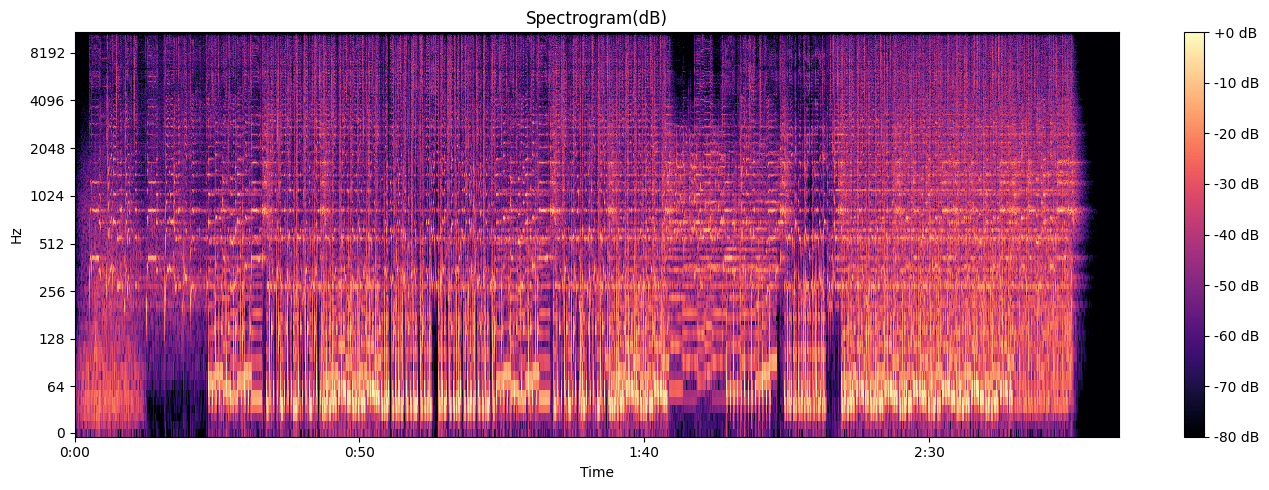

In [ ]:
plt.figure(figsize=(14,5))
librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='log')
plt.title('Spectrogram(dB)')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [ ]:
import librosa

librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [ ]:
pip install speech_recognition

ERROR: Could not find a version that satisfies the requirement speech_recognition (from versions: none)
ERROR: No matching distribution found for speech_recognition


In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install speech_recognition

ERROR: Could not find a version that satisfies the requirement speech_recognition (from versions: none)
ERROR: No matching distribution found for speech_recognition


In [ ]:
import speech_recognition as sr
recognizer = sr.Recognizer()


ModuleNotFoundError: No module named 'speech_recognition'

In [ ]:
with sr.Microphone() as source:

In [ ]:
pip install SpeechRecognition

In [ ]:
!pip install PyAudio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for PyAudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyAudio
Failed to build PyAudio
ERROR: Failed to build installable wheels for some pyproject.toml based projects (PyAudio)


In [ ]:
!sudo apt-get update
!sudo apt-get install portaudio19-dev python3-dev
!pip install PyAudio

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [32.8 kB]
Fetched 308 kB in 2s (182 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois

In [ ]:
import speech_recognition as sr

In [ ]:
recognizer = sr.Recognizer()

In [ ]:
with sr.Microphone() as source:
  print("Say something:")
  audio=recognizer.listen(source)
try:
  print("Transcribed Text:", recognizer.recognize_google(audio))
except sr.UnknownValueError:
  print("Sorry, I couldn't understand what you said.")

OSError: No Default Input Device Available